In [ ]:
from skimage.morphology import medial_axis, skeletonize
from skimage import data
import matplotlib.pyplot as plt
import numpy as np
from skimage.filters import threshold_otsu
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import nibabel as nib

# Generate the data
blobs = data.binary_blobs(128, blob_size_fraction=.2,
                          volume_fraction=.35)

# Compute the medial axis (skeleton) and the distance transform
skel, distance = medial_axis(blobs, return_distance=True)

# Compare with other skeletonization algorithms
skeleton = skeletonize(blobs)
skeleton_lee = skeletonize(blobs, method='lee')

# Distance to the background for pixels of the skeleton
dist_on_skel = distance * skel

fig, axes = plt.subplots(2, 2, figsize=(8, 8), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(blobs, cmap=plt.cm.gray)
ax[0].set_title('original')
ax[0].axis('off')

ind = np.unravel_index(np.argmax(dist_on_skel, axis=None), dist_on_skel.shape)

ax[1].imshow(dist_on_skel > dist_on_skel.max()- 1e-12, cmap='magma')
ax[1].contour(blobs, [0.5], colors='w')
ax[1].set_title('medial_axis')
ax[1].axis('off')

ax[2].imshow(skeleton, cmap=plt.cm.gray)
ax[2].set_title('skeletonize')
ax[2].axis('off')

ax[3].imshow(skeleton_lee, cmap=plt.cm.gray)
ax[3].set_title("skeletonize (Lee 94)")
ax[3].axis('off')

fig.tight_layout()
plt.show()

print(dist_on_skel.max())



In [ ]:


fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

size = 128
m = data.binary_blobs(size, blob_size_fraction=.2,
                          volume_fraction=.3, n_dim = 3)

pos = np.where(m==1)
ax.scatter(pos[0], pos[1], pos[2], c='black', s=1)
plt.show()

In [66]:
import skimage

x, y = skimage.draw.disk((10, 10), 8)

d = np.zeros((size,size,size))
for i in range(100):
    d[x + 30 + int(np.sin(i / 30 * np.pi)*30), y + 30 + int(np.sin(i / 30 * np.pi)*30), i] = 1.0

img = nib.Nifti1Image(d.astype(np.float64), np.eye(4))

nib.save(img, '../data/test.nii.gz')


1


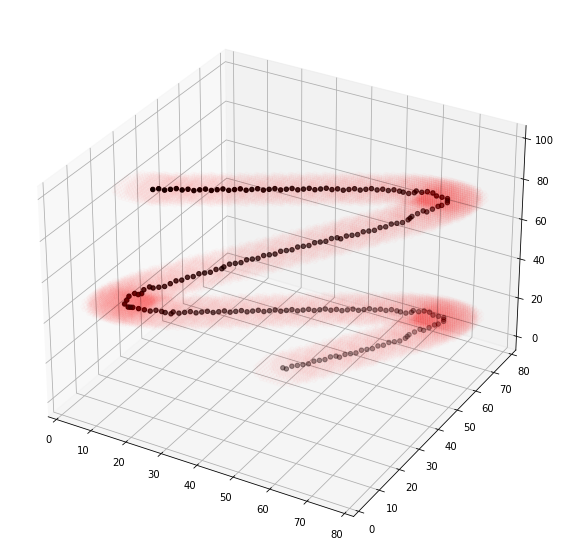

(array([ 3,  3,  3, ..., 77, 77, 77]), array([ 7,  8,  9, ..., 72, 73, 73]), array([45, 45, 45, ..., 75, 15, 75]))


In [69]:
skel = skeletonize(d.astype(np.uint8), method='lee')
print(skel.max())
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

pos = np.where(skel==1)
ax.scatter(pos[0], pos[1], pos[2], c='black')
pos = np.where(d==1)
ax.scatter(pos[0], pos[1], pos[2], c='red', alpha=0.01)
plt.show()

print(pos)

In [73]:
from scipy.ndimage.measurements import label

structure = np.array([[[0, 1, 0],
  [1, 1, 1],
  [0, 1, 0]],
 [[1, 1, 1],
  [1, 1, 1],
  [1, 1, 1]],
 [[0, 1, 0],
  [1, 1, 1],
  [0, 1, 0]]])

labeled, ncomponents = label(d, structure)

In [74]:
ncomponents

1

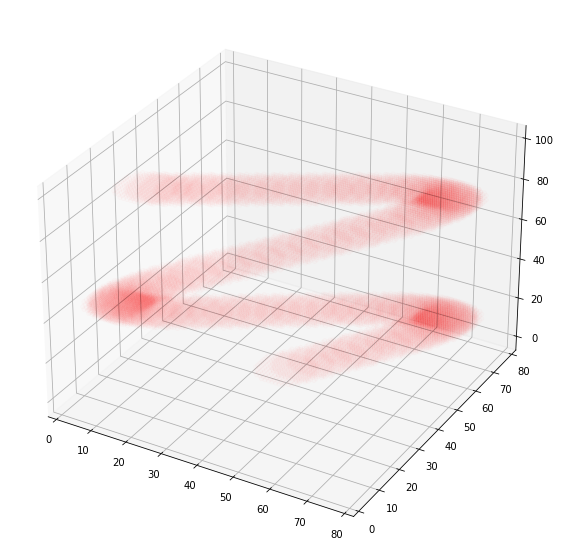

In [75]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

pos = np.where(labeled==1)
ax.scatter(pos[0], pos[1], pos[2], c='red', alpha=0.01)
plt.show()